# **TITANIC SURVIVOR ANALYSIS**
---

### **Importing the Packages:**
Firstly, we will import the required packages namely *numpy*, *pandas*, *seaborn* and *matplotlib.pyplot*.

In [188]:
# importing the required packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### **Reading the .csv file:**
Now we will use pandas *read_csv* function to read the .csv file of survivor list into python and convert it into a data frame using pandas *DataFrame()* method in order to analyze it.


In [189]:
df=pd.DataFrame(pd.read_csv('./train.csv'))    # reading a .csv file and creating its dataframe
df1 = df
df.head()   # displays top 5 values of the data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Some common attributes:**
We will use some of the attributes of the pandas dataframe to begin with the analysis:

In [190]:
df.ndim      # gives the number of dimensions of the data

2

In [191]:
df.shape     # gives the number of rows and columns of the data

(891, 12)

In [192]:
df.size       # gives the number of rows times number of columns of data frame

10692

In [193]:
df.columns   # gives the names of columns/fields in the data frame

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Since every dataset consistes of missing or null values, they need to be taken care of. Here for each column we will check for the null values using *isnull()* method and then count them using *sum()* method.

In [194]:
# isnull() method will return True or 1 if NaN is found otherwise False or 0

x=df.isnull().sum()     # returns a pandas series with column names as label index
x

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now we will take only those columns that have less than 30% null values, thus dropping the rest.

In [195]:
# df.shape[0] will return the number of rows in the data frame

drop_col = x[x>30/100 * df.shape[0]]   # returns the columns containing more than 30% of missing values
drop_col

Cabin    687
dtype: int64

We will drop this column using *drop()* method which eliminates any rows with NaN values when axis = 0 is used and will eliminate any columns with NaN values when axis = 1 is used.

In [196]:
df.drop(drop_col.index, axis=1, inplace=True)     # dropping the columns with more than 30% NaN values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### **Analysis on the basis of:**

##### **[A] Sex:**
In the following snippet, we will find out the number of passengers who initially boarded the Titanic, and the number of passengers who survived. Also, we will analyze the survival rate of men and women, thereby visualizing it using bar graphs.

Passengers Boarded:
-------------------
Total number of passengers = 891
Number of male passengers = 577
Number of female passengers = 314

Following bar graph shows the number of male and female passengers before the sink:


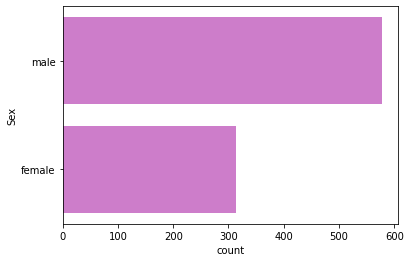

In [197]:
# Before the sink
print('Passengers Boarded:')
print('-------------------')
print('Total number of passengers =',df.shape[0])
mp=pd.DataFrame(df[df['Sex']=='male']).shape[0]            # count of male passengers
print('Number of male passengers =', mp)
fp=pd.DataFrame(df[df['Sex']=='female']).shape[0]          # count of female passengers
print('Number of female passengers =', fp)
print()
print('Following bar graph shows the number of male and female passengers before the sink:')
sb.countplot(data = df, y = 'Sex', color = 'orchid');      # countplot() plots a bar graph

Passengers Survived:
-------------------
Total number of passengers = 342
Number of male passengers = 109
Number of female passengers = 233

Following bar graph shows the number of male and female survivors:


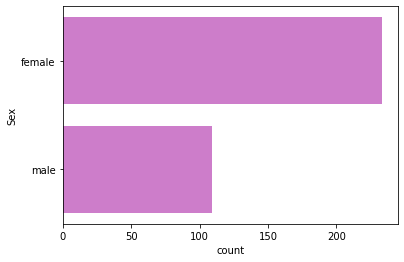

In [198]:
# After the sink
print('Passengers Survived:')
print('-------------------')
print('Total number of passengers =', df['Survived'].sum())
male=pd.DataFrame(df[df['Sex']=='male'])         # dataframe containing details of the male passengers only
print('Number of male passengers =', male['Survived'].sum())
fem=pd.DataFrame(df[df['Sex']=='female'])        # dataframe containing details of the female passengers only
print('Number of female passengers =', fem['Survived'].sum())
print()
surv=pd.DataFrame(df[df['Survived']==1])         # dataframe containing details of the survivors only
print('Following bar graph shows the number of male and female survivors:')
sb.countplot(data = surv, y = 'Sex', color = 'orchid');     # countplot() plots a bar graph

`Hence, there were 891 passengers who boarded the Titanic, out of which only 342 survived.`

We can also see that number of women who survived were more than twice the number of men. `Thus, we conclude that survival rate of women was more than that of men.`

##### **[B] Name:**
Now we will see the number passenegrs in the dataset with same names before and after the sink.

In [199]:
# Passengers with same call name before the sink
c=0
same_pass=[]
for i in df.Name:
  c=0
  i=i.split(',')[0]
  for j in df.Name:
    j=j.split(',')[0]
    if i==j:
      if i not in same_pass:
        c+=1
  if c>1:
    same_pass.append(i)
    print('There are', c, i, 'aboard')
print('---------------------')
print('Passengers with same call name before the sink =', len(same_pass))

There are 2 Braund aboard
There are 2 Futrelle aboard
There are 2 Allen aboard
There are 3 Moran aboard
There are 4 Palsson aboard
There are 6 Johnson aboard
There are 2 Nasser aboard
There are 2 Sandstrom aboard
There are 9 Andersson aboard
There are 5 Rice aboard
There are 4 Williams aboard
There are 3 Vander Planke aboard
There are 4 Asplund aboard
There are 4 Fortune aboard
There are 3 Meyer aboard
There are 2 Holverson aboard
There are 2 Nicola-Yarred aboard
There are 2 Turpin aboard
There are 3 Laroche aboard
There are 2 Arnold-Franchi aboard
There are 6 Panula aboard
There are 4 Harper aboard
There are 3 West aboard
There are 6 Goodwin aboard
There are 4 Harris aboard
There are 6 Skoog aboard
There are 2 Moubarek aboard
There are 2 Caldwell aboard
There are 2 Backstrom aboard
There are 4 Ford aboard
There are 2 Dean aboard
There are 2 Doling aboard
There are 2 Kantor aboard
There are 2 Petroff aboard
There are 2 White aboard
There are 3 Johansson aboard
There are 4 Gustafsson ab

In [200]:
# Survivors with same call name
c=0
same_surv=[]
for i in surv.Name:
  c=0
  i=i.split(',')[0]
  for j in surv.Name:
    j=j.split(',')[0]
    if i==j:
      if i not in same_surv:
        c+=1
  if c>1:
    same_surv.append(i)
    print('There are', c, i, 'aboard')
print('---------------------')
print('Survivors with same call name =', len(same_surv))

There are 3 Johnson aboard
There are 2 Sandstrom aboard
There are 3 Asplund aboard
There are 2 Nicola-Yarred aboard
There are 2 Laroche aboard
There are 3 Harper aboard
There are 2 West aboard
There are 2 Moubarek aboard
There are 2 Andersson aboard
There are 2 Caldwell aboard
There are 2 Fortune aboard
There are 2 Doling aboard
There are 2 Peter aboard
There are 2 Goldsmith aboard
There are 2 Becker aboard
There are 2 Navratil aboard
There are 3 Brown aboard
There are 2 Newell aboard
There are 2 Hoyt aboard
There are 2 Harris aboard
There are 2 Collyer aboard
There are 2 Murphy aboard
There are 2 Hamalainen aboard
There are 2 Beckwith aboard
There are 2 Graham aboard
There are 2 Mellinger aboard
There are 2 Bishop aboard
There are 3 Kelly aboard
There are 2 McCoy aboard
There are 2 Hays aboard
There are 2 Ryerson aboard
There are 2 Wick aboard
There are 2 Hippach aboard
There are 2 Frauenthal aboard
There are 2 Coutts aboard
There are 2 Nakid aboard
There are 4 Carter aboard
There are

Thus, `we conclude that there were 133 passengers with same call name before the sink, out of which only 52 survived.`

##### **[C] Age:**
In the following snippet, we are filling the missing values of the 'Age' column with the mean of age of all passengers, as this will hardly make any difference, and at the same time, it will make further analysis easier.

We will calculate the range and average age of passengers on the ship, and thus plot a histogram for the same.

Range of age of passengers on the ship => 0.42 to 80.0
-------------------
Mean age of passengers that boarded = 29

Following histogram shows the range and mean age of passengers before the sink:


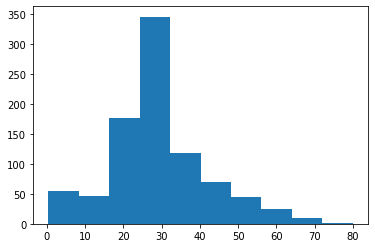

In [201]:
df['Age'].fillna(round(df['Age'].median()), inplace=True)        # filling missing values with the mean of the column
print('Range of age of passengers on the ship =>', min(df['Age']), 'to', max(df['Age']))
print('-------------------')
print('Mean age of passengers that boarded =', round(df['Age'].mean()))
print()
print('Following histogram shows the range and mean age of passengers before the sink:')
plt.hist(data = df, x = 'Age');           # plt.hist() plots a histogram

Mean age of survivors = 28

Following histogram shows the range and mean age of survivors:


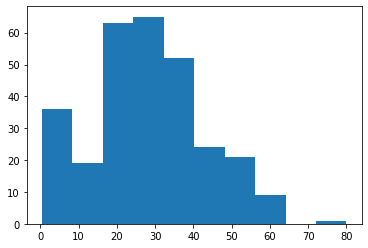

In [202]:
print('Mean age of survivors =', round(surv['Age'].mean()))
print('\nFollowing histogram shows the range and mean age of survivors:')
plt.hist(data = surv, x = 'Age');         # plt.hist() plots a histogram

Hence, `average age of passengers boarded on the ship was 30 and that of survivors was 28.`

##### **[D] Passenger Class:**
In the following code snippet, we will first look at the original number of passengers from each class with the help of a pie chart. Consequently, we will calculate the relative survivors of each class to the total number of passengers of that class.

Each portion of the following pie chart depicts number of passengers on the ship from each class:


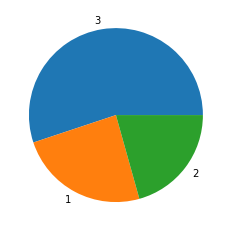

In [203]:
print('Each portion of the following pie chart depicts number of passengers on the ship from each class:')
pclass=df['Pclass'].value_counts()           # plotting a pie chart
plt.pie(pclass, labels=pclass.index);        # to depict number of passengers

Relative survivors of first class = 62 %
Relative survivors of second class = 47 %
Relative survivors of third class = 24 %

Each portion of the following pie chart depicts number of survivors from each class:


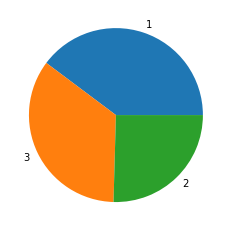

In [204]:
# Relative survivors from each class

first=pd.DataFrame(df[df['Pclass']==1])     # dataframe containing details of passengers of first class
print('Relative survivors of first class =', (int)(first['Survived'].sum()/first.shape[0] * 100), '%')

second=pd.DataFrame(df[df['Pclass']==2])    # dataframe containing details of passengers of second class
print('Relative survivors of second class =', (int)(second['Survived'].sum()/second.shape[0] * 100), '%')

third=pd.DataFrame(df[df['Pclass']==3])     # dataframe containing details of passengers of third class
print('Relative survivors of third class =', (int)(third['Survived'].sum()/third.shape[0] * 100), '%\n')

print('Each portion of the following pie chart depicts number of survivors from each class:')
pclass=surv['Pclass'].value_counts()        # plotting a pie chart
plt.pie(pclass, labels=pclass.index);       # to depict number of survivors

We can see that percentage of passengers belonging to first class survived more than those of the second and the third class. `Hence, we conclude that first class was preffered the most, followed by the second and then the third.`

##### **[E] Port of Embarkation:**
Now we will take a look at the ports of embarkation using *describe()* method which gives the count of non NaN values, number of unique values, most frequent value and its frequency.

In [205]:
print(df['Embarked'].describe())           # viewing some basic statistical details

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


In the following snippet, we are filling the NaN values of the 'Embarked' column with its most frequent value 'S', as this will hardly make any difference, and at the same time, it will make further analysis easier.

In [206]:
df['Embarked'].fillna('S', inplace=True)     # filling the missing values with the most frequent value of the column

Now we will analyze and visualize the number of passengers boarded and the number of passengers survived in the end.

168 number of passengers embarked from Cherbourd(C) out of which  93 survived
77 number of passengers embarked from Queenstown(Q) out of which  30 survived
646 number of passengers embarked from Southampton(S) out of which  219 survived

Following bar graph shows count of passengers boarded from each port:


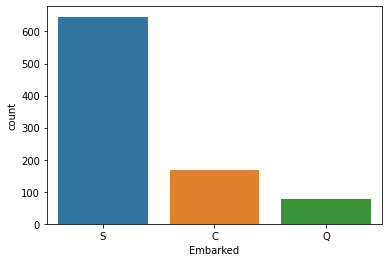

In [207]:
c=pd.DataFrame(df[df['Embarked']=='C'])           # dataframe containing details of passengers boarded from Cherbourg
print(c.shape[0], 'number of passengers embarked from Cherbourd(C) out of which ', c['Survived'].sum(), 'survived')

q=pd.DataFrame(df[df['Embarked']=='Q'])           # dataframe containing details of passengers boarded from Queenstown
print(q.shape[0], 'number of passengers embarked from Queenstown(Q) out of which ', q['Survived'].sum(), 'survived')

s=pd.DataFrame(df[df['Embarked']=='S'])           # dataframe containing details of passengers boarded from Southampton
print(s.shape[0], 'number of passengers embarked from Southampton(S) out of which ', s['Survived'].sum(), 'survived\n')

print('Following bar graph shows count of passengers boarded from each port:')
sb.countplot(data=df, x='Embarked');              # countplot() plots a bar graph

Following bar graph shows count of survivors from each port:


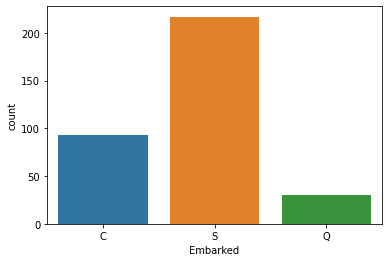

In [208]:
print('Following bar graph shows count of survivors from each port:')
sb.countplot(data=surv, x='Embarked');        # countplot() plots a bar graph

We will now use *groupby()* function to find the relative survivors from each port.

In [209]:
# Probability of survivors from each port
print('Probability of survivors from each port:')
print(df.groupby(['Embarked'])['Survived'].mean())     # groupby() provides a mapping of labels to group names

Probability of survivors from each port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


From the above analysis and the two bar graphs showing number of passengers from each port before and after the sink, `we have come to the conclusion that passengers who boarded from Cherbourg survived more in proportion to those who boarded from Queenstown and Southampton.`

##### **[F] Correlation of columns:**
Now we will see the correlation of columns with each other using *corr()* method, in order to draw some conclusions.

In [210]:
df.corr()      # computes pairwise correlation of columns, excluding null values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


Thus, `we can conclude that Fare and Pclass have a negative correlation implying that fare for the first class was the most, followed by the second and the third class.`


##### **[G] Family Members onboard:**
Since we are given the number of siblings/spouses and parents/children aboard, we will combine these two to create a new column containing size of the family. We will thereby drop these two columns and then compute the correlation.

In [211]:
df['Family_Size']= df['SibSp'] + df['Parch']              # combining 2 columns to make another
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)         # dropping the 2 columns
alone=pd.DataFrame(df[df['Family_Size']==0])              # dataframe containing details of passengers boarded alone
family=pd.DataFrame(df[df['Family_Size']!=0])             # dataframe containing details of passengers boarded with family
print(alone.shape[0], 'passengers were traveling alone out of which', alone['Survived'].sum(), 'survived')
print('Survival rate =', (int)(alone['Survived'].sum()/alone.shape[0] * 100), '%')
print()
print(family.shape[0], 'passengers were traveling with family out of which', family['Survived'].sum(), 'survived')
print('Survival rate =', (int)(family['Survived'].sum()/family.shape[0] * 100), '%')

537 passengers were traveling alone out of which 163 survived
Survival rate = 30 %

354 passengers were traveling with family out of which 179 survived
Survival rate = 50 %


Thus, `we can conclude that survival rate of passengers traveling with family was more than of those traveling alone.` 

We can also note the correlation between the family-size and ticket-fare.

In [212]:
df[['Family_Size', 'Fare']].corr()

,Family_Size,Fare
Family_Size,1.000000,0.217138
Fare,0.217138,1.000000


From the above computation of positive correlation, `we conclude that passengers traveling with family had more chances of higher ticket price.`

---

### **Conclusions:**
1. There were 891 passengers who boarded the Titanic, out of which only 342 survived.
2. Survival rate of women was more than that of men.
3. There were 133 passengers with same call name before the sink, out of which only 52 survived.
4. Average age of passengers boarded on the ship was 30 and that of survivors was 28.
5. Survival rate of first class was the most, followed by the second and then the third.
6. Passengers who boarded from Cherbourg survived more in proportion to those who boarded from Queenstown and Southampton.
7. Fare and Pclass have a negative correlation implying that fare for the first class was the most, followed by the second and the third class.
8. Survival rate of passengers traveling with family was more than of those traveling alone.
9. Passengers traveling with family had more chances of higher ticket price.




# Logistic Regression

In [213]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [214]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


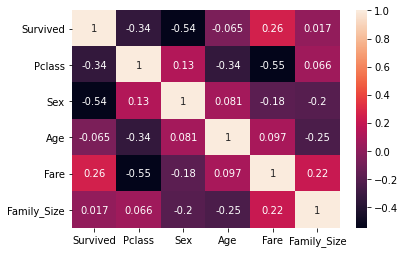

In [215]:

try:
    df = df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis= 1)
    df.Sex = df['Sex'].replace({'male': 1, 'female':0})
except:
    df.Sex = df['Sex'].replace({'male': 1, 'female':0})
sb.heatmap(df.corr(), annot = True);

In [216]:
X = df.drop('Survived', axis =1)
Y = df.Survived
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size= 0.15, random_state= 1)
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape) 

(757, 5)
(134, 5)
(757,)
(134,)


In [217]:
log_reg = linear_model.LogisticRegression(random_state= 1)
log_reg.fit(X_TRAIN,Y_TRAIN)

LogisticRegression(random_state=1)

In [218]:
train_score = log_reg.score(X_TRAIN, Y_TRAIN)
test_score = log_reg.score(X_TEST,Y_TEST)
print(train_score, test_score)

0.7952443857331571 0.8059701492537313
